### TUGAS SAINS DATA PADA INDUSTRI 
# **EDA Customer Churn Dataset**

Nama : Talitha Rahmadewati Witanto (1206220022)

---
<br>

<br>

In [331]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [332]:
!pip install yellowbrick
import yellowbrick

# METADATA:
### customerID : (String) ID unik untuk setiap pelanggan.
### gender : (String) Jenis kelamin pelanggan (Male atau Female).
### SeniorCitizen :	(Integer) Status kewarganegaraan senior (0 untuk bukan warga senior, 1 untuk warga senior).
### Partner : (String)	Status pasangan (Yes atau No), menunjukkan apakah pelanggan memiliki pasangan.
### Dependents : (String) Status tanggungan (Yes atau No), menunjukkan apakah pelanggan memiliki tanggungan.
### tenure : (Integer) Jumlah bulan pelanggan telah bersama perusahaan.
### PhoneService :	(String) Layanan telepon (Yes atau No).
### MultipleLines :	(String) Layanan telepon dengan beberapa saluran (Yes, No, atau No phone service).
### InternetService : (String) Jenis layanan internet (DSL, Fiber optic, atau No).
### OnlineSecurity : (String) Layanan keamanan online (Yes, No, atau No internet service).
### OnlineBackup : (String)	Layanan backup online (Yes, No, atau No internet service).
### DeviceProtection : (String)	Perlindungan perangkat (Yes, No, atau No internet service).
### TechSupport	: (String)	Dukungan teknis (Yes, No, atau No internet service).
### StreamingTV : (String)	Layanan streaming TV (Yes, No, atau No internet service).
### StreamingMovies	: (String)	Layanan streaming film (Yes, No, atau No internet service).
### Contract : (String)	Jenis kontrak pelanggan (Month-to-month, One year, atau Two year).
### PaperlessBilling : (String)	Faktur tanpa kertas (Yes atau No).
### PaymentMethod :	(String) Metode pembayaran (Electronic check, Mailed check, Bank transfer (automatic), atau Credit card (automatic)).
### MonthlyCharges : (Float) Biaya bulanan yang dikenakan kepada pelanggan.
### TotalCharges : (Float)	Total biaya yang dikenakan kepada pelanggan.
### Churn : (String) Status churn (Yes atau No), menunjukkan apakah pelanggan berhenti menggunakan layanan.

# **LOAD DATASET**

In [333]:
df = pd.read_csv('Case 2 - Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Overview Dataset

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [335]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df


,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,customerID,object,0,0.0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[Yes, No]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[1, 34, 2, 45, 8]"
6,PhoneService,object,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,0,0.0,3,"[No phone service, No, Yes]"
8,InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"


In [336]:
df.shape

(7043, 21)

# **DATA CLEANING**

In [337]:
df1 = df.copy()

In [338]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [339]:

df1.duplicated().sum()

0

### Mengubah tipe menjadi numerik dan imputasi kolom 'TotalCharges' 

In [340]:
df1['MonthlyCharges'] = pd.to_numeric(df1['MonthlyCharges'], errors='coerce') 
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce') 
df1['TotalCharges'].fillna(df1['TotalCharges'].median(), inplace=True)

### Mengubah kata 

In [341]:
df1.replace({'MultipleLines': {'No phone service': 'No'},
            'OnlineSecurity': {'No internet service': 'No'},
            'OnlineBackup': {'No internet service': 'No'},
            'DeviceProtection': {'No internet service': 'No'},
            'TechSupport': {'No internet service': 'No'},
            'StreamingTV': {'No internet service': 'No'},
            'StreamingMovies': {'No internet service': 'No'}}, inplace=True)

df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [342]:
list_item = []
for col in df1.columns:
    list_item.append([col, df1[col].dtype, df1[col].isna().sum(), round(100*df1[col].isna().sum()/len(df1[col]), 2), df1[col].nunique(), df1[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df


,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,customerID,object,0,0.0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[Yes, No]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[1, 34, 2, 45, 8]"
6,PhoneService,object,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,0,0.0,2,"[No, Yes]"
8,InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,object,0,0.0,2,"[No, Yes]"


### Cek Outlier

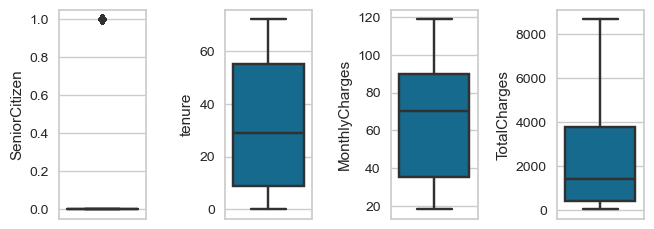

In [343]:
nums = df1.loc[:, (df1.dtypes == 'int64') | (df1.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df1[nums[i]], orient='v')
    plt.tight_layout()

# **FEATURE ENGINEERING**

### Menambahkan kolom 'MonthlyChargeRatio'

In [344]:
df1['MonthlyChargeRatio'] = df1['MonthlyCharges'] / df1['TotalCharges']
df1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargeRatio
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1.000000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.030140
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.497920
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.022980
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.466205
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0.121450
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0.045706
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0.098543
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,0.034405
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0.016098


In [345]:
df1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargeRatio
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1.000000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.030140
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.497920
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.022980
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.466205
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0.121450
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0.045706
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0.098543
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,0.034405
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0.016098


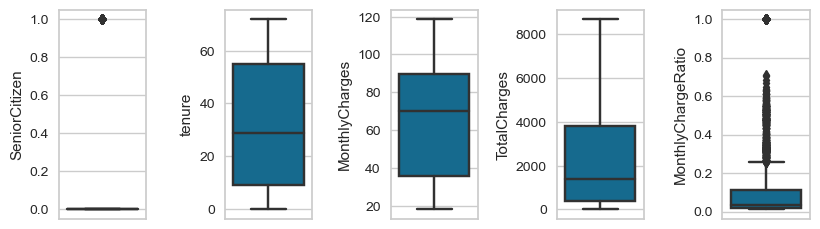

In [346]:
nums = df1.loc[:, (df1.dtypes == 'int64') | (df1.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df1[nums[i]], orient='v')
    plt.tight_layout()

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [347]:
df2 = df1.copy()

In [348]:
#df2['AverageCharges'] = df2['TotalCharges'] / df2['tenure']

In [349]:
# numerical feature
cat_nums = df2.loc[:, (df2.dtypes == 'int64') | (df2.dtypes == float)].columns.tolist()
cat_nums = cat_nums[0:]
print(cat_nums)
print(len(cat_nums))

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyChargeRatio']
5


In [350]:
# categorical fearure
cats = df2.loc[:, (df2.dtypes == 'object')].columns.tolist()
print(cats)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## Statistical Summary

In [351]:
df2.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2281.92,2265.27,18.80,402.22,1397.48,3786.60,8684.80
MonthlyChargeRatio,7043.0,0.16,0.28,0.01,0.02,0.03,0.11,1.00


insight:
- Mayoritas pelanggan bukan warga senior, terbukti dari nilai mean, median, dan distribusi minimum hingga maksimum yang semuanya 0.
- Mayoritas pelanggan telah berlangganan selama 37 bulan (sekitar 3 tahun), dengan masa langganan bervariasi antara 17 hingga 60 bulan.
- Rata-rata pelanggan mengeluarkan biaya bulanan sebesar Rp63,870, dengan mayoritas biaya berkisar antara Rp26,450 hingga Rp89,850.
- Total biaya yang dibayarkan mayoritas pelanggan mencapai Rp1.724.150, dengan nilai maksimum hingga Rp8.684.800.
- Mayoritas pelanggan memiliki rasio biaya bulanan rendah, dengan rata-rata 0,05 dan mayoritas pelanggan berada di kisaran 0,02 hingga 0,06.

In [352]:
df2[cats].describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,2,No,4072
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,2,No,5024
OnlineBackup,7043,2,No,4614
DeviceProtection,7043,2,No,4621


insight:
- Mayoritas pelanggan laki-laki (2482)
- Sebagian besar memiliki pasangan (2656)
- Mayoritas tidak memiliki tanggungan anak (3108)
- Sebagian besar menggunakan layanan telepon (4466)
- Mayoritas hanya memiliki satu jalur telepon (2782)
- Layanan internet terbanyak Fiber optic (1919)
- Mayoritas tidak menggunakan Online Security (3297) dan Online Backup (3109)
- Sebagian besar tidak menggunakan Device Protection (3083) dan Tech Support (3258)
- Mayoritas tidak menggunakan StreamingTV (2975) dan StreamingMovies (2978)
- Kontrak terbanyak bulan-ke-bulan (2150)
- Sebagian besar memilih tagihan tanpa kertas (2778)
- Metode pembayaran terbanyak Electronic check (1365)
- Mayoritas tidak berhenti berlangganan (4056)

## Univariate Analysis

### Graphical Methods

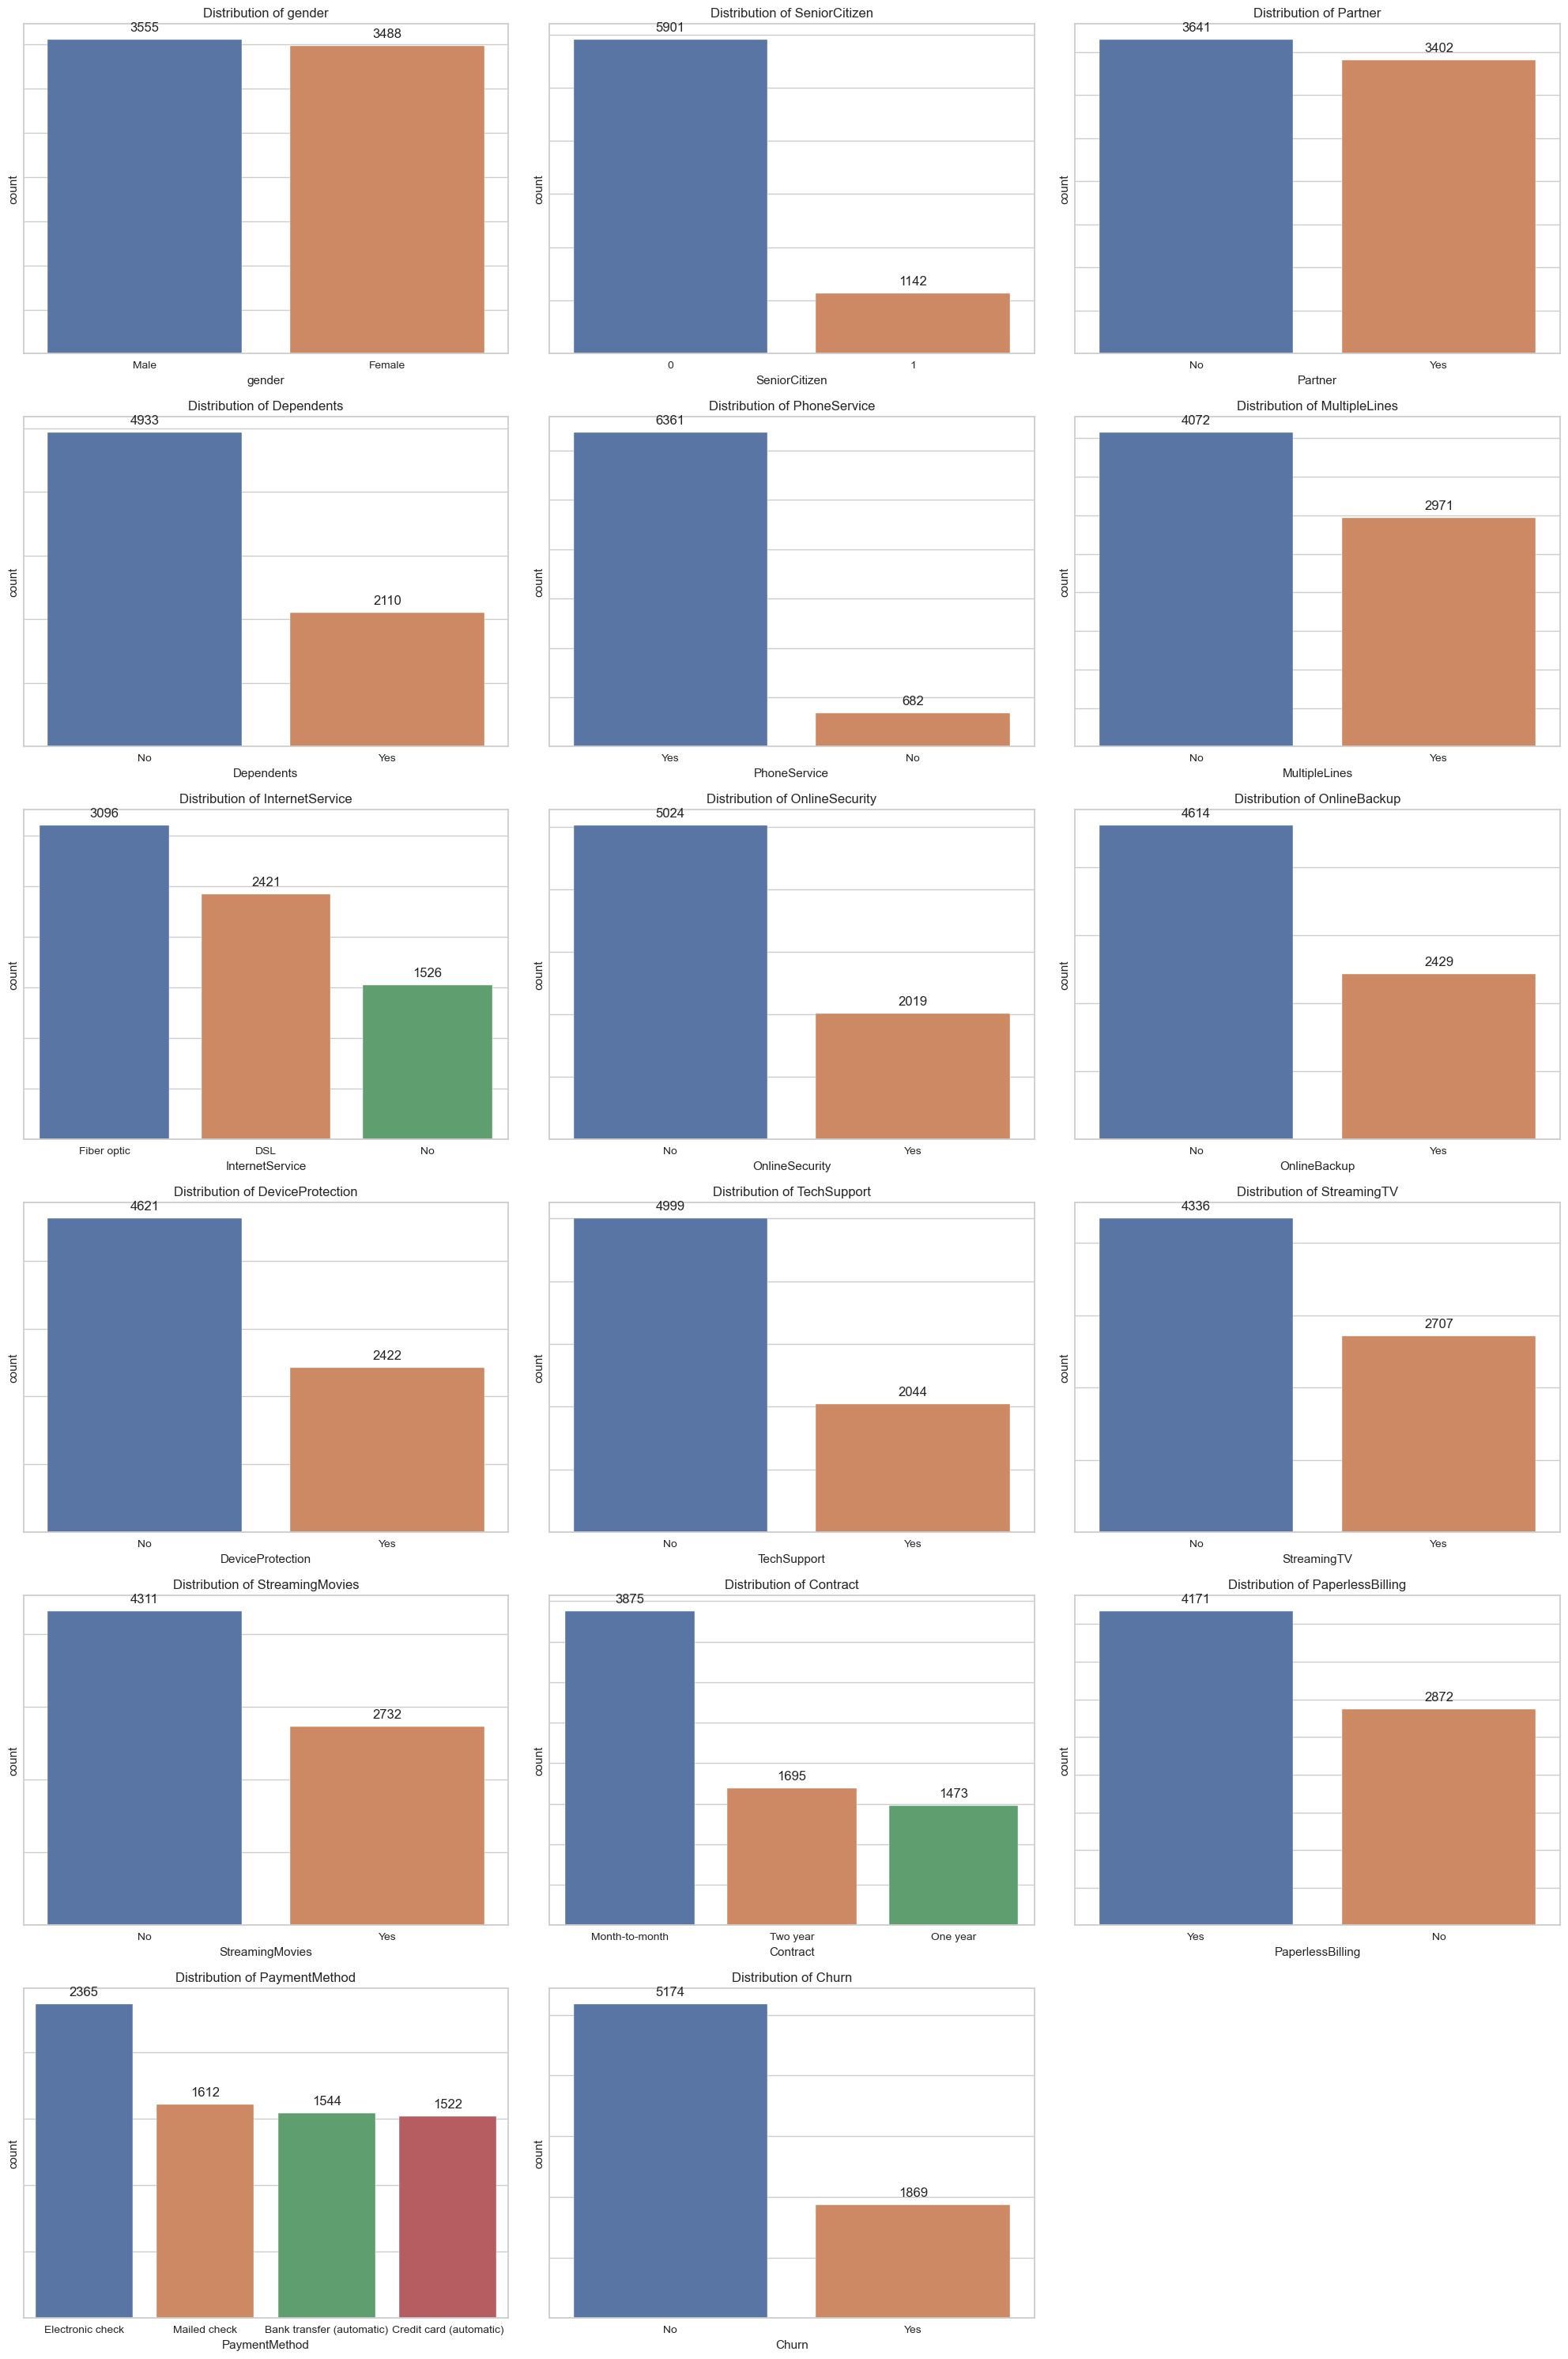

In [354]:
cat_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
           'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

n_cols = 3  
n_rows = int(np.ceil(len(cat_col) / n_cols))  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten() 

for i, col in enumerate(cat_col):
    ax = axes[i]  
    sns.countplot(x=df2[col], ax=ax, palette='deep', order=df2[col].value_counts().index)

    for bar in ax.patches:
        txt = np.round(bar.get_height()).astype('int64')
        ax.annotate(f'{txt}', 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

    ax.set_title(f'Distribution of {col}')
    ax.tick_params(axis='y', left=False, labelleft=False)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


key takeaways:
- Gender: Mayoritas pelanggan adalah laki-laki 2482 pelanggan
- Partner: Pelanggan dengan pasangan 2656 pelanggan
- Dependents: Pelanggan tanpa tanggungan 3108 pelanggan
- PhoneService: Pelanggan dengan layanan telepon 4466 pelanggan
- MultipleLines: Pelanggan dengan satu jalur telepon 2782 pelanggan
- InternetService: Layanan fiber optic digunakan oleh 1919 pelanggan
- OnlineSecurity & Backup: Pelanggan tanpa Online Security 3297 pelanggan dan tanpa Online Backup 3109 pelanggan
- DeviceProtection & TechSupport: Pelanggan tanpa Device Protection 3083 pelanggan dan tanpa Tech Support 3258 pelanggan
- Streaming Services: Pelanggan tanpa StreamingTV 2975 pelanggan dan tanpa StreamingMovies 2978 pelanggan
- Contract: Kontrak bulan-ke-bulan digunakan oleh 2150 pelanggan
- PaperlessBilling: Pelanggan dengan tagihan tanpa kertas 2778 pelanggan
- PaymentMethod: Metode pembayaran electronic check digunakan oleh 1365 pelanggan
- Churn: Pelanggan yang tidak berhenti berlangganan 4056 pelanggan

### Non Graphical Method

Untuk metode Non Graphical Univariate bisa dilihat pada section statistical summary

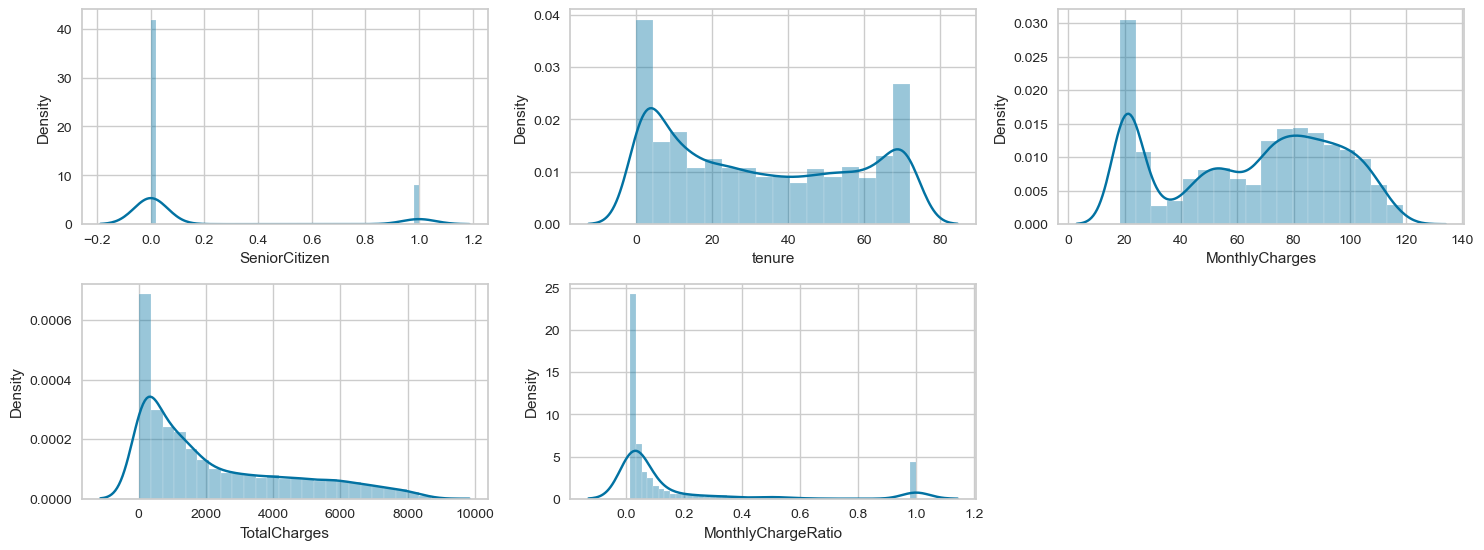

In [355]:
# cek distribusi fitur numerikal
plt.figure(figsize=(15, 8))
for i in range(0, len(cat_nums)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df2[cat_nums[i]])
    plt.tight_layout()


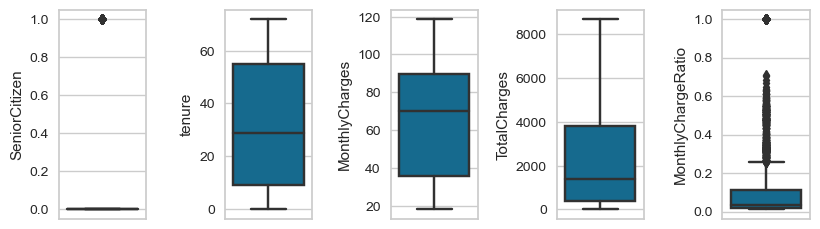

In [356]:
plt.figure(figsize=(15, 7))
for i in range(0, len(cat_nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df1[cat_nums[i]], orient='v')
    plt.tight_layout()

## Bivariate Analysis

Teknik analisis statistik yang melibatkan dua variabel untuk menentukan hubungan atau interaksi antara keduanya. Tujuan dari bivariate analysis adalah untuk memahami bagaimana satu variabel mempengaruhi variabel lainnya dan untuk mengidentifikasi pola, tren, atau korelasi di antara mereka

### Graphical Method

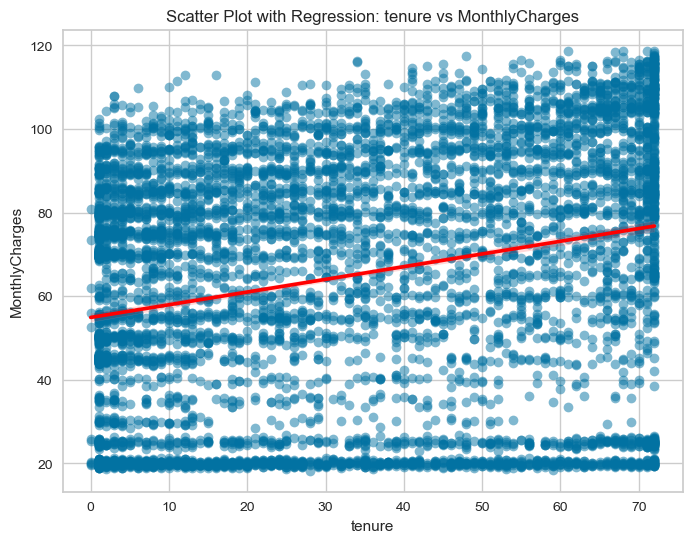

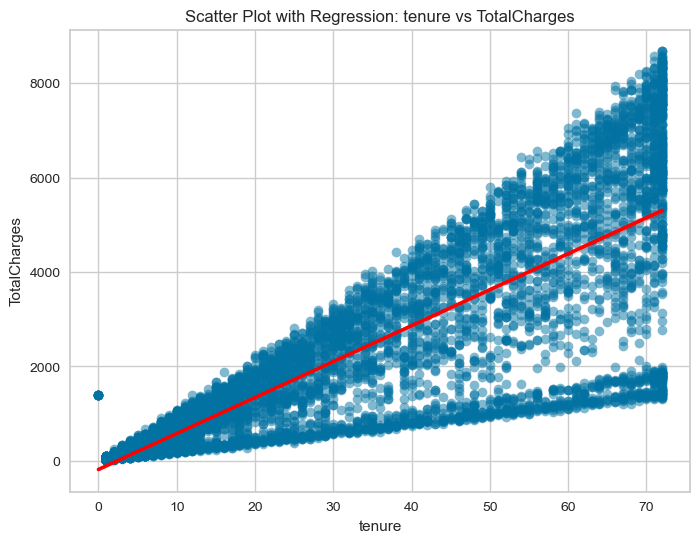

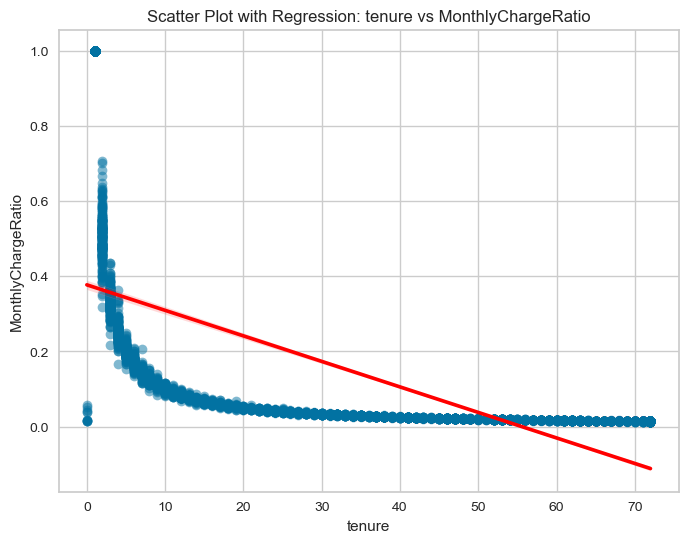

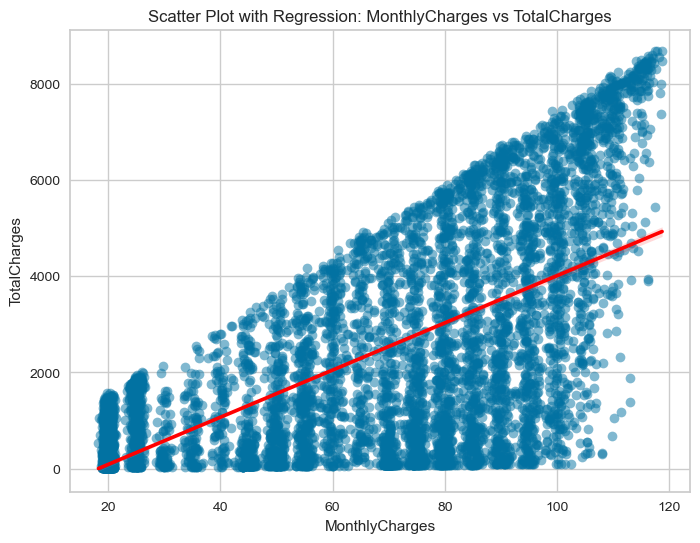

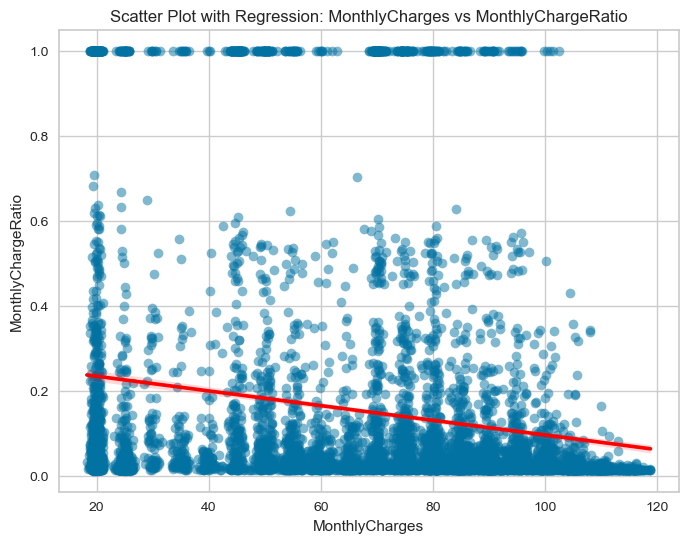

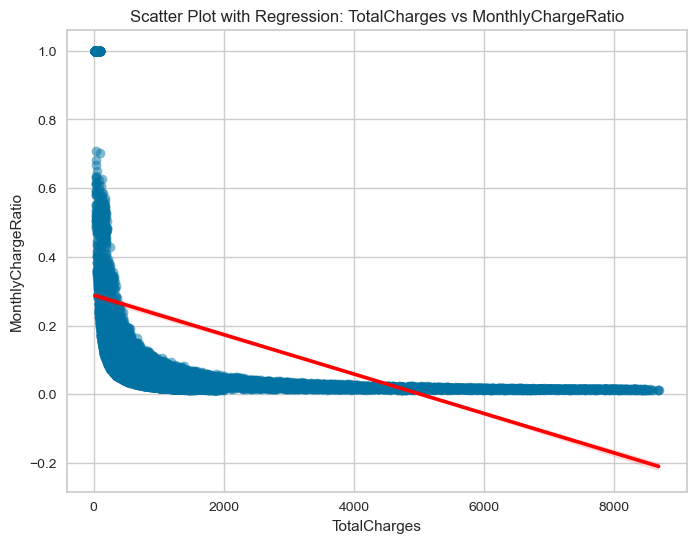

In [357]:
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyChargeRatio']

for i in range(len(numerical_vars)):
    for j in range(i + 1, len(numerical_vars)):
        plt.figure(figsize=(8, 6))
        sns.regplot(x=numerical_vars[i], y=numerical_vars[j], data=df2, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
        plt.title(f'Scatter Plot with Regression: {numerical_vars[i]} vs {numerical_vars[j]}')
        plt.xlabel(numerical_vars[i])
        plt.ylabel(numerical_vars[j])
        plt.show()

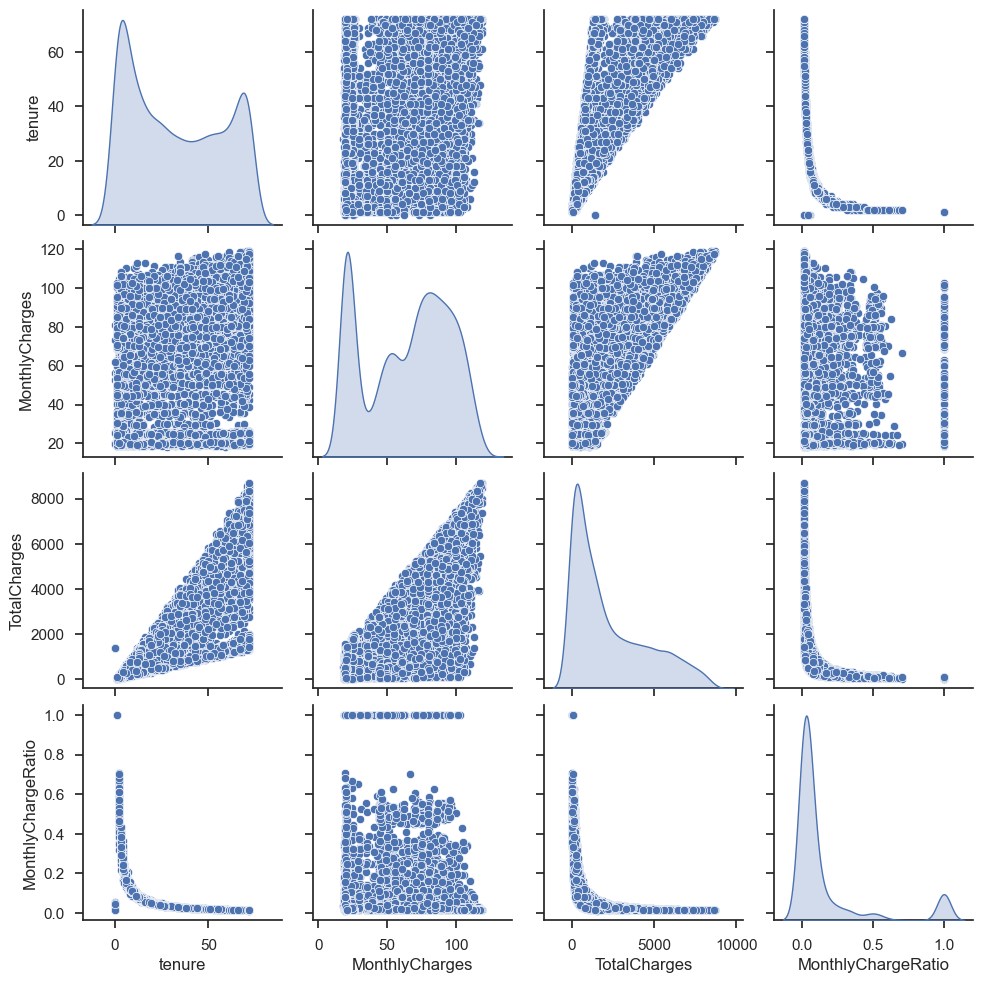

In [358]:
sns.set(style="ticks")
sns.pairplot(df2[numerical_vars], diag_kind="kde")
plt.show()

#### Hitung korelasi

In [359]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargeRatio
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1.000000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.030140
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.497920
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.022980
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.466205


In [360]:
correlation_matrix = df2.corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MonthlyChargeRatio
SeniorCitizen,1.000000,0.016567,0.220173,0.102652,-0.019766
tenure,0.016567,1.000000,0.247900,0.825464,-0.592640
MonthlyCharges,0.220173,0.247900,1.000000,0.650864,-0.184733
TotalCharges,0.102652,0.825464,0.650864,1.000000,-0.462007
MonthlyChargeRatio,-0.019766,-0.592640,-0.184733,-0.462007,1.000000


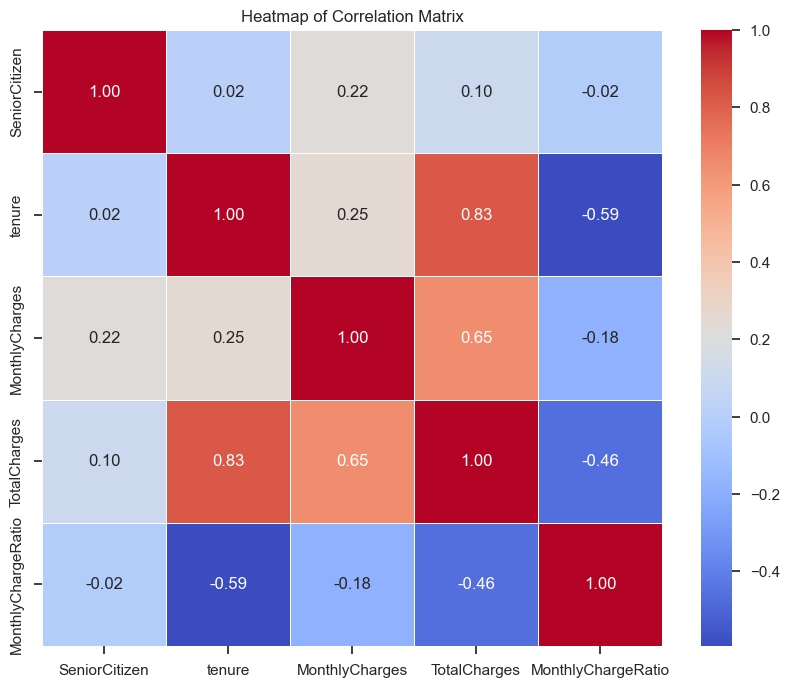

In [361]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

key takeaways:

- Hubungan Lemah dengan SeniorCitizen:
Tidak terdapat korelasi signifikan antara SeniorCitizen dengan variabel lain, menunjukkan bahwa status sebagai warga senior tidak berdampak besar terhadap lama berlangganan, biaya bulanan, atau total biaya

- Tenure dan TotalCharges:
Terdapat korelasi positif yang kuat antara tenure dan TotalCharges (0.83), yang menunjukkan bahwa semakin lama pelanggan berlangganan, semakin tinggi total biaya yang mereka bayar

- Tenure dan MonthlyCharges:
Terdapat korelasi positif yang moderat antara tenure dan MonthlyCharges (0.25), menunjukkan bahwa pelanggan dengan waktu berlangganan yang lebih lama cenderung membayar lebih tinggi setiap bulannya

- MonthlyCharges dan TotalCharges:
Terdapat korelasi positif yang kuat antara MonthlyCharges dan TotalCharges (0.65), yang menunjukkan bahwa pelanggan yang membayar lebih tinggi per bulan juga cenderung memiliki total biaya yang lebih besar

- MonthlyChargeRatio Negatif:
Terdapat korelasi negatif antara MonthlyChargeRatio dan tenure (-0.59), yang menunjukkan bahwa semakin lama pelanggan berlangganan, rasio biaya bulanan terhadap total biaya semakin rendah

- Keterkaitan Biaya Bulanan:
MonthlyCharges dan MonthlyChargeRatio memiliki korelasi negatif (-0.18), menunjukkan bahwa jika pelanggan memiliki biaya bulanan yang lebih tinggi, rasio biaya bulanan terhadap total biaya mereka cenderung lebih rendah

### Non Graphical Method

#### Korelasi Churn dg numerik lainnnya

In [362]:
df_biv = df2.copy()

In [363]:
df_biv['ChurnNumeric'] = df_biv['Churn'].map({'Yes': 1, 'No': 0})

correlation_with_churn = df_biv.corr()['ChurnNumeric']
print("Korelasi dengan Churn:")
correlation_with_churn

Korelasi dengan Churn:


SeniorCitizen         0.150889
tenure               -0.352229
MonthlyCharges        0.193356
TotalCharges         -0.199037
MonthlyChargeRatio    0.318824
ChurnNumeric          1.000000
Name: ChurnNumeric, dtype: float64

key takeaways:
- SeniorCitizen: Korelasi positif (0.15) menunjukkan warga senior cenderung sedikit lebih mungkin untuk churn
- Tenure: Korelasi negatif (-0.35) mengindikasikan bahwa semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka untuk churn
- MonthlyCharges: Korelasi positif (0.19) menunjukkan bahwa pelanggan dengan biaya bulanan lebih tinggi memiliki kecenderungan lebih besar untuk churn
- TotalCharges: Korelasi negatif (-0.20) menunjukkan bahwa total biaya yang lebih tinggi cenderung berkaitan dengan kemungkinan churn yang lebih rendah
- MonthlyChargeRatio: Korelasi positif (0.32) menunjukkan bahwa pelanggan dengan rasio biaya bulanan yang lebih tinggi terhadap total biaya lebih mungkin untuk churn


#### Covariance variabel dan churn

In [364]:
covariance_matrix = df_biv.cov()
covariance_with_churn = covariance_matrix['ChurnNumeric']
print("Kovarians dengan Churn:")
print(covariance_with_churn)

Kovarians dengan Churn:
SeniorCitizen           0.024559
tenure                 -3.819750
MonthlyCharges          2.569050
TotalCharges         -199.087736
MonthlyChargeRatio      0.039606
ChurnNumeric            0.194976
Name: ChurnNumeric, dtype: float64


key takeaways:
- SeniorCitizen: Kovarians positif (0.0246) menunjukkan sedikit pengaruh pada churn
- Tenure: Kovarians negatif (-3.82) menunjukkan bahwa semakin lama pelanggan berlangganan, semakin besar penurunan dalam churn
- MonthlyCharges: Kovarians positif (2.57) menunjukkan bahwa biaya bulanan yang lebih tinggi berhubungan dengan peningkatan churn
- TotalCharges: Kovarians negatif (-199.09) menunjukkan bahwa total biaya yang lebih tinggi cenderung mengurangi churn
- MonthlyChargeRatio: Kovarians positif (0.0396) menunjukkan sedikit pengaruh pada churn.

#### Crosstab

In [365]:
# Partner dan Churn
crosstab_partner_churn = pd.crosstab(df_biv['Partner'], df_biv['Churn'])
print("Crosstab antara Partner dan Churn:")
print(crosstab_partner_churn)

print('--------------------------------------------------------------------')

# InternetService dan Churn
crosstab_internet_churn = pd.crosstab(df_biv['InternetService'], df_biv['Churn'])
print("Crosstab antara InternetService dan Churn:")
print(crosstab_internet_churn)


Crosstab antara Partner dan Churn:
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
--------------------------------------------------------------------
Crosstab antara InternetService dan Churn:
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


key takeaways:
- Partner vs Churn:
Pelanggan tanpa pasangan lebih cenderung churn (1.200 dari 2.441) dibandingkan dengan pelanggan yang memiliki pasangan (669 dari 2.733)
- InternetService vs Churn:
Pelanggan dengan Fiber optic memiliki tingkat churn yang lebih tinggi (1.297 dari 1.799) dibandingkan dengan DSL (459 dari 1.962) dan No service (113 dari 1.413)

#### T-Test

In [366]:
from scipy import stats

churned = df_biv[df_biv['Churn'] == 'Yes']['MonthlyCharges']
not_churned = df_biv[df_biv['Churn'] == 'No']['MonthlyCharges']

t_stat, p_value = stats.ttest_ind(churned, not_churned)
print("T-test untuk MonthlyCharges:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-test untuk MonthlyCharges:
T-statistic: 16.536738015936308, P-value: 2.7066456068884154e-60


key takeaways: 
T-statistic: 16.54, P-value: sangat rendah (2.71e-60), menunjukkan bahwa ada perbedaan signifikan dalam biaya bulanan antara pelanggan yang churn dan yang tidak.


## Multivariate Analysis

### Graphical Method

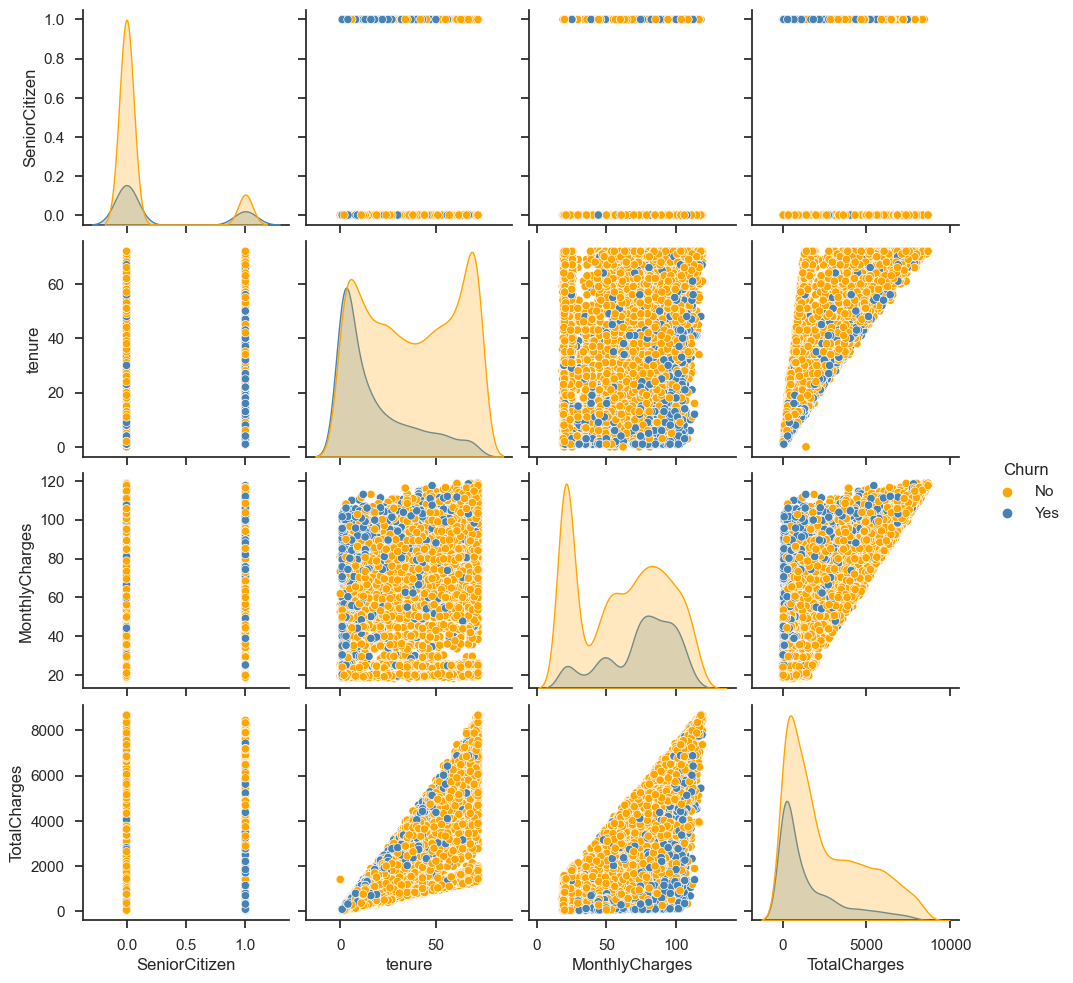

In [367]:
sns.set(style="ticks")

sns.pairplot(df2[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], 
             hue='Churn', palette=['orange', 'steelblue'], diag_kind="kde")

plt.show()

### Non Graphical Method

### DATA PRE-PROCESSING

#### Feature Encoding

In [368]:
df_prep = df2.copy()

In [369]:
columns_to_drop = ['customerID']  
df_prep = df_prep.drop(columns=columns_to_drop)

###

In [371]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


le = LabelEncoder()
for col in categorical_cols:
    df_prep[col] = le.fit_transform(df_prep[col])
df_prep.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargeRatio
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,2,29.85,29.85,0,1.00000
1,1,0,0,0,34,1,0,0,1,0,...,0,0,0,1,0,3,56.95,1889.50,0,0.03014
2,1,0,0,0,2,1,0,0,1,1,...,0,0,0,0,1,3,53.85,108.15,1,0.49792


In [372]:
scaler = StandardScaler()

standardized_array = scaler.fit_transform(df_prep)
standardized_df = pd.DataFrame(standardized_array, columns=df_prep.columns.tolist())
X = pd.concat([df_prep.drop(columns=df_prep.columns.tolist()), standardized_df], axis=1)

X.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargeRatio
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-1.183234,-0.633933,1.378241,...,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,0.398558,-1.160323,-0.994242,-0.601023,2.995259
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,-1.183234,1.577454,-0.725563,...,-0.639439,-0.790132,-0.79607,0.371271,-1.205113,1.334863,-0.259629,-0.173244,-0.601023,-0.452348
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-1.183234,1.577454,1.378241,...,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,1.334863,-0.362660,-0.959674,1.663829,1.210489


### Modeling

In [373]:
df_model = X.copy()

#### PCA
---
PCA dilakukan untuk mengurangi dimensi data dengan mempertahankan informasi yang signifikan.

In [374]:
# fit pca
pca = PCA(n_components = 2)
pca.fit(df_model)

# pca transformed 
data_pca = pca.transform(df_model)

In [375]:
data_pca1 = pd.DataFrame(data_pca)

In [376]:
# mencari nilai k optimal dengan parameter inertia

inertia = []
k_values = range(2,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(data_pca1)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

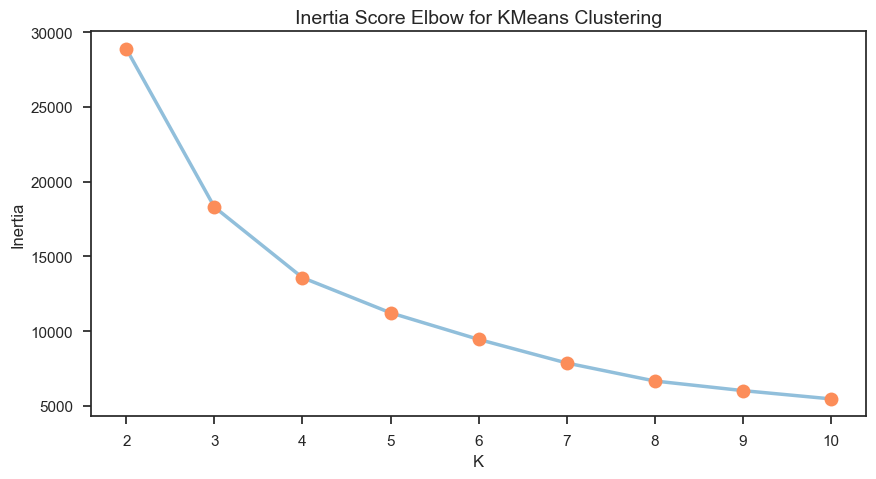

In [377]:
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))

plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

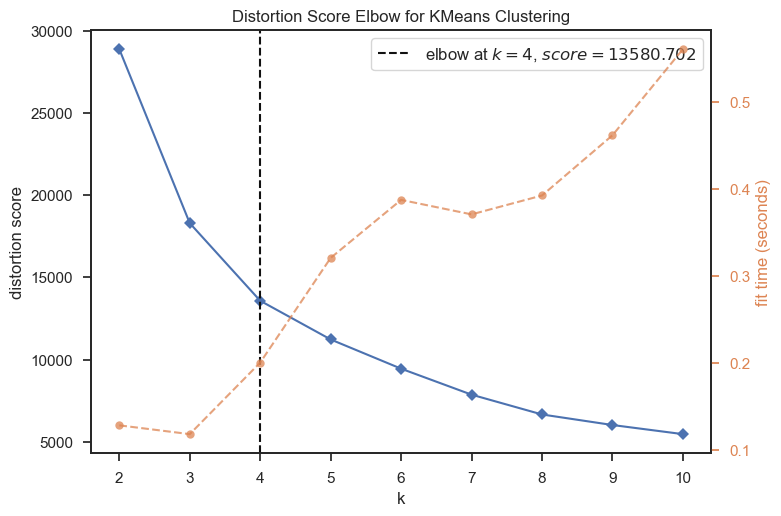

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [378]:
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(data_pca1)       
visualizer.show() 

Key takeaways:
- Berdasarkan Distortion Score dan Elbow methode didapatkan jumlah cluster terbaik adalah 4

#### Clustering with K-Means
---

In [379]:
# fit model
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(data_pca1.values)
data_pca1['cluster'] = kmeans.labels_

In [380]:
data_pca1.sample(5)

,0,1,cluster
1793,-0.177676,-3.741702,2
298,1.563028,0.509880,0
1170,5.131085,-0.695621,1
1976,-1.431338,4.101280,3
1445,0.485811,1.749032,0


Text(0.5, 1.0, 'Cluster Segementation')

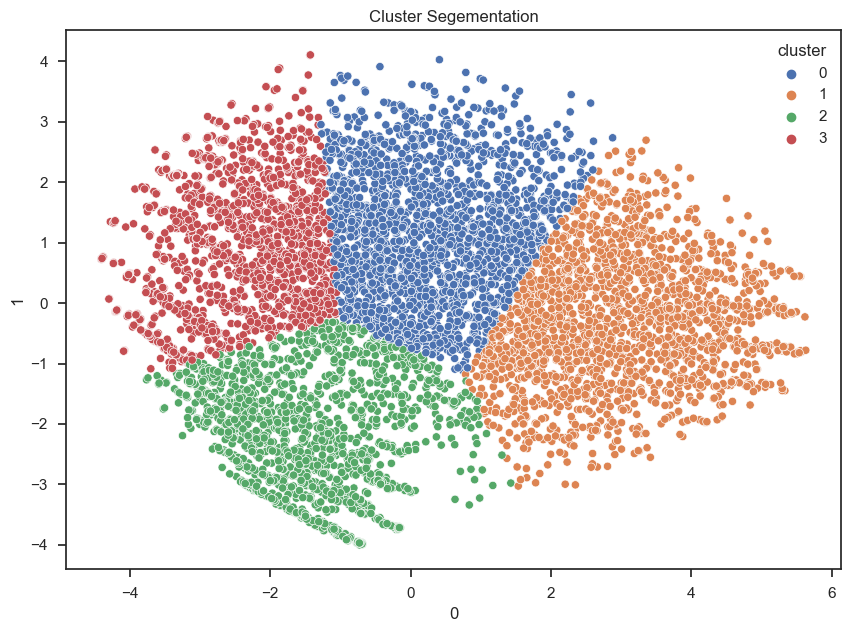

In [381]:
# visualisasi hasi segmentasi
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=data_pca1, x=0, y=1, hue='cluster', palette='deep')
plt.title('Cluster Segementation')

#### Evaluation
---

In [382]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=123)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

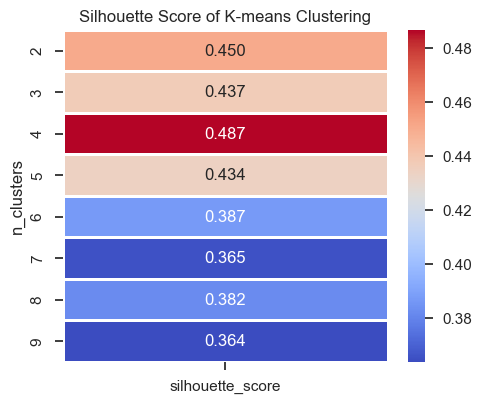

In [383]:
visualize_silhouette_layer(data_pca1)

Key takeaways:
- Berdasarkan Silhouette Score, jumlah cluster terbaik yang direkomendasikan adalah 4. 
- Nilai Silhouette Score pada jumlah cluster tersebut lebih tinggi dibandingkan dengan jumlah cluster lainnya, menandakan kualitas clustering yang lebih baik.

In [384]:
df_prep['cluster'] = kmeans.labels_
df_prep

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargeRatio,cluster
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,2,29.85,29.85,0,1.000000,3
1,1,0,0,0,34,1,0,0,1,0,...,0,0,1,0,3,56.95,1889.50,0,0.030140,2
2,1,0,0,0,2,1,0,0,1,1,...,0,0,0,1,3,53.85,108.15,1,0.497920,3
3,1,0,0,0,45,0,0,0,1,0,...,0,0,1,0,0,42.30,1840.75,0,0.022980,2
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,0.466205,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,...,1,1,1,1,3,84.80,1990.50,0,0.042602,1
7039,0,0,1,1,72,1,1,1,0,1,...,1,1,1,1,1,103.20,7362.90,0,0.014016,1
7040,0,0,1,1,11,0,0,0,1,0,...,0,0,0,1,2,29.60,346.45,0,0.085438,2
7041,1,1,1,0,4,1,1,1,0,0,...,0,0,0,1,3,74.40,306.60,1,0.242661,3


In [385]:
cluster_names = {
    0: "Loyal Customer",
    1: "Premium Customer",
    2: "Budget Customer",
    3: "Trial Customer"
}

df_prep['cluster'] = df_prep['cluster'].replace(cluster_names)
df_prep.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargeRatio,cluster
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,2,29.85,29.85,0,1.000000,Trial Customer
1,1,0,0,0,34,1,0,0,1,0,...,0,0,1,0,3,56.95,1889.50,0,0.030140,Budget Customer
2,1,0,0,0,2,1,0,0,1,1,...,0,0,0,1,3,53.85,108.15,1,0.497920,Trial Customer
3,1,0,0,0,45,0,0,0,1,0,...,0,0,1,0,0,42.30,1840.75,0,0.022980,Budget Customer
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,0.466205,Trial Customer


In [386]:
feats = ['tenure', 'MonthlyCharges', 'TotalCharges', 'cluster']
data_summary = df_prep[feats]

In [387]:
data_summary

,tenure,MonthlyCharges,TotalCharges,cluster
0,1,29.85,29.85,Trial Customer
1,34,56.95,1889.50,Budget Customer
2,2,53.85,108.15,Trial Customer
3,45,42.30,1840.75,Budget Customer
4,2,70.70,151.65,Trial Customer
...,...,...,...,...
7038,24,84.80,1990.50,Premium Customer
7039,72,103.20,7362.90,Premium Customer
7040,11,29.60,346.45,Budget Customer
7041,4,74.40,306.60,Trial Customer


In [388]:
round(data_summary.groupby('cluster').agg(['median']),2).round()

,tenure,MonthlyCharges,TotalCharges
,median,median,median
cluster,,,
Budget Customer,35.0,21.0,908.0
Loyal Customer,24.0,85.0,1795.0
Premium Customer,63.0,91.0,5368.0
Trial Customer,3.0,51.0,126.0


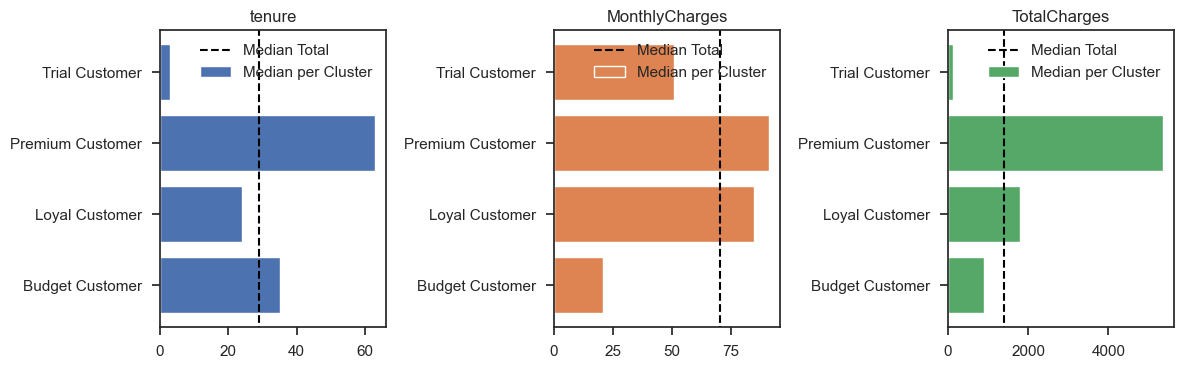

In [389]:
def dist_list(lst):
    plt.figure(figsize=[12, 7])
    colors = sns.color_palette("deep", n_colors=len(lst))
    
    i = 1
    for col, color in zip(lst, colors):
        ax = plt.subplot(2, 3, i)
        ax.vlines(df_prep[col].median(), ymin=-1, ymax=4, color='black', linestyle='--', label='Median Total')
        g = df_prep.groupby('cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x, y, color=color, label='Median per Cluster')
        ax.set_title(col)
        ax.legend()
        i += 1
        
    plt.tight_layout()
    plt.show()

dist_list(['tenure', 'MonthlyCharges', 'TotalCharges'])


insight:

Berdasarkan hasil clustering, dapat diketahui karakteristik dari setiap segmen cluster:
- Cluster 0
    - Tenure median tertinggi yaitu 24 bulan
    - Monthly Charges median cukup tinggi, yaitu Rp. 85.000
    - Total Charges median juga tinggi, yaitu Rp. 1.795.000
    - Kelompok ini menunjukkan pola keterikatan yang baik dengan produk atau layanan.

- Cluster 1
    - Tenure median tertinggi yaitu 63 bulan
    - Monthly Charges median cukup stabil, yaitu Rp. 91.000
    - Total Charges median cukup tinggi, yaitu Rp. 5.368.000
    - Kelompok ini menunjukkan loyalitas tinggi, namun dengan pengeluaran yang lebih signifikan.

- Cluster 2
    - Tenure median rendah yaitu 35 bulan
    - Monthly Charges median terendah, yaitu Rp. 21.000
    - Total Charges median cukup rendah, yaitu Rp. 908.000
    - Kelompok ini menunjukkan ketergantungan yang rendah pada layanan yang ditawarkan.

- Cluster 3
    - Tenure median sangat rendah yaitu 3 bulan
    - Monthly Charges median sedang, yaitu Rp. 51.000
    - Total Charges median terendah, yaitu Rp. 126.000
    - Kelompok ini merupakan pelanggan baru atau yang tidak terlalu aktif.

Dari karakteristik tersebut, setiap cluster dapat dikelompokkan berdasarkan kategori, yaitu:
- Cluster 0: "High-Tenure Moderate-Spending Group" - Loyal Customer
- Cluster 1: "Long-Term High-Spending Group" - Premium Customer
- Cluster 2: "Short-Term Low-Spending Group" - Budget Customer
- Cluster 3: "New Customer Low-Spending Group" - Trial Customer

In [390]:
# persentase total customer setiap cluster
cluster_count = data_summary['cluster'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(data_summary))*100,2)
cluster_count = cluster_count.sort_values(by=['cluster']).reset_index(drop=True)
cluster_count

,cluster,count,percentage (%)
0,Budget Customer,1529,21.71
1,Loyal Customer,2009,28.52
2,Premium Customer,1894,26.89
3,Trial Customer,1611,22.87


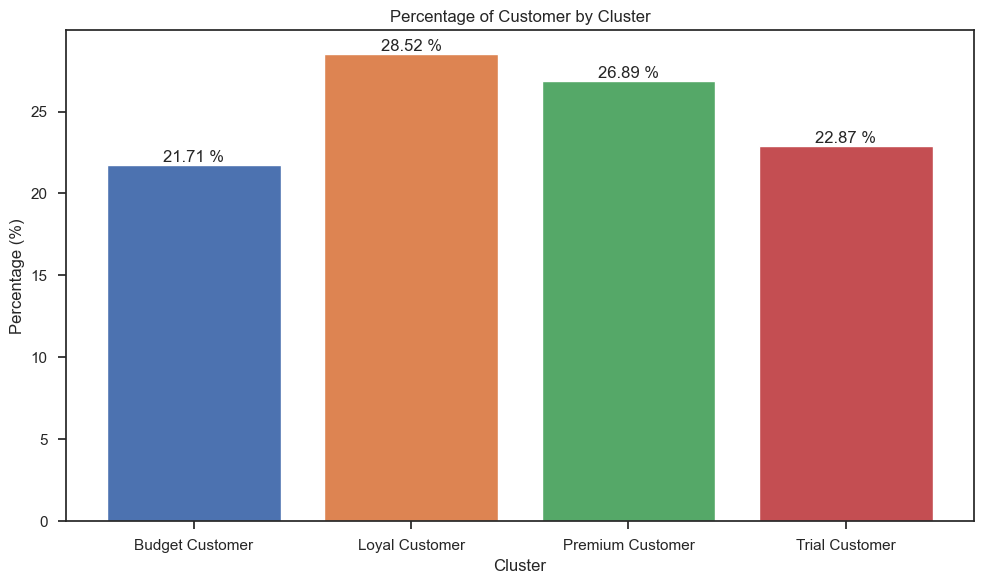

In [391]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("deep", n_colors=len(cluster_count))

bars = ax.bar(x=cluster_count['cluster'], height=cluster_count['percentage (%)'], color=colors)

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height:.2f} %', ha='center', va='bottom')

plt.title('Percentage of Customer by Cluster')
plt.xticks(range(0, 4))
plt.ylabel('Percentage (%)')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

insight:
- Berdasarkan hasil analisis, ditemukan bahwa 28.52% dari populasi termasuk dalam kelompok Loyal Customer, yang merupakan kelompok terbesar. Kelompok ini menunjukkan komitmen tinggi terhadap produk, sehingga perusahaan dapat memanfaatkan loyalitas ini untuk meningkatkan penjualan melalui program loyalitas dan promosi khusus.

- Kelompok Premium Customer menyumbang 26.89% dari populasi. Meskipun jumlahnya lebih rendah dibandingkan dengan Loyal Customer, kelompok ini memiliki potensi pengeluaran yang tinggi. Perusahaan dapat mengembangkan strategi pemasaran yang lebih eksklusif dan premium untuk meningkatkan kepuasan dan retensi pelanggan dalam kelompok ini.

- Budget Customer, yang berjumlah 21.71%, memiliki tingkat pengeluaran yang lebih rendah. Meskipun jumlah mereka signifikan, strategi untuk menarik perhatian kelompok ini harus difokuskan pada penawaran yang terjangkau dan promosi yang mengedepankan nilai, untuk mendorong mereka melakukan pembelian lebih sering.

- Terakhir, kelompok Trial Customer yang terdiri dari 22.87% dari populasi dapat menjadi sasaran untuk strategi pemasaran yang menarik. Membangun pengalaman positif bagi mereka dapat meningkatkan kemungkinan mereka beralih menjadi Loyal atau Premium Customer. Perusahaan perlu menawarkan promosi menarik dan program percobaan untuk meningkatkan konversi dari kelompok ini.